In [1]:
import glob
import numpy as np
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing, LineString
import matplotlib.pyplot as plt
import os.path

In [2]:
# Conveniently list available tracks to analyze
available_track_files = glob.glob("./tracks/**.npy")
available_track_names = list(map(lambda x: os.path.basename(x).split('.npy')[0], available_track_files))
available_track_names

['reInvent2019_track',
 '2022_august_open',
 'Canada_Training',
 'canada_race',
 'Tokyo_Training_track',
 'Oval_track',
 'New_York_Track',
 'Bowtie_track',
 'H_track',
 'reinvent_base',
 'Mexico_track',
 'Virtual_May19_Train_track',
 'Straight_track',
 'AWS_track',
 'China_track',
 '2022_july_open',
 '2022_june_open',
 'London_Loop_Train']

In [3]:
# Replace the name here with the track to analyze
TRACK_NAME = '2022_august_open'

# Load the center, inner, outer waypoints
waypoints = np.load("./tracks/%s.npy" % TRACK_NAME)

# Separate into center, inner, outer waypoints
center_line = waypoints[:,0:2]
inner_border = waypoints[:,2:4]
outer_border = waypoints[:,4:6]

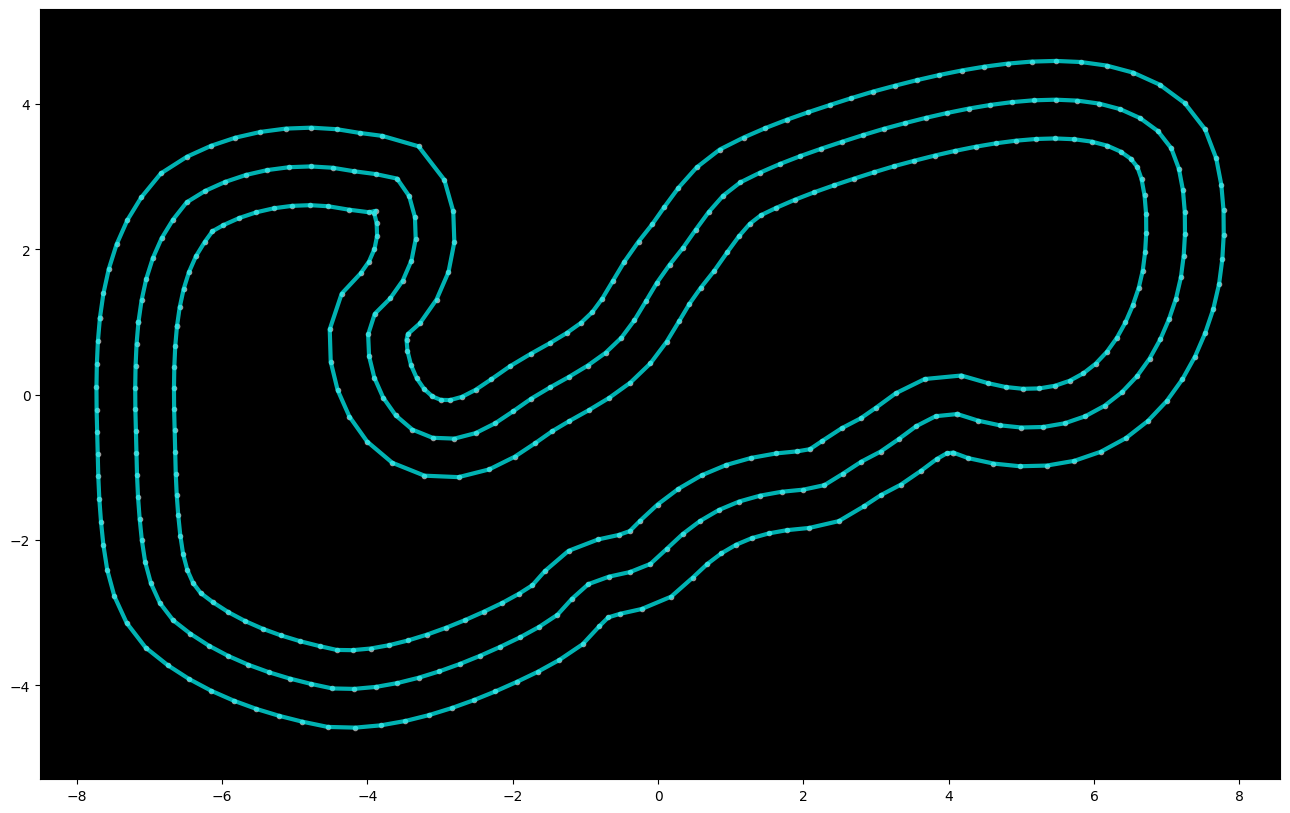

In [4]:
def plot_coords(ax, ob):                                                        
    x, y = ob.xy                                                                
    ax.plot(x, y, '.', color='#999999', zorder=1)                               
                                                                                
def plot_bounds(ax, ob):                                                        
    x, y = zip(*list((p.x, p.y) for p in ob.boundary))                          
    ax.plot(x, y, '.', color='#000000', zorder=1)                               
                                                                                
def plot_line(ax, ob):                                                          
    x, y = ob.xy                                                                
    ax.plot(x, y, color='cyan', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
                                                                                
def print_border(ax, waypoints, inner_border_waypoints, outer_border_waypoints):
    line = LineString(waypoints)                                                
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(inner_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)                                                         
                                                                                
    line = LineString(outer_border_waypoints)                                   
    plot_coords(ax, line)                                                       
    plot_line(ax, line)     

fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, center_line, inner_border, outer_border)

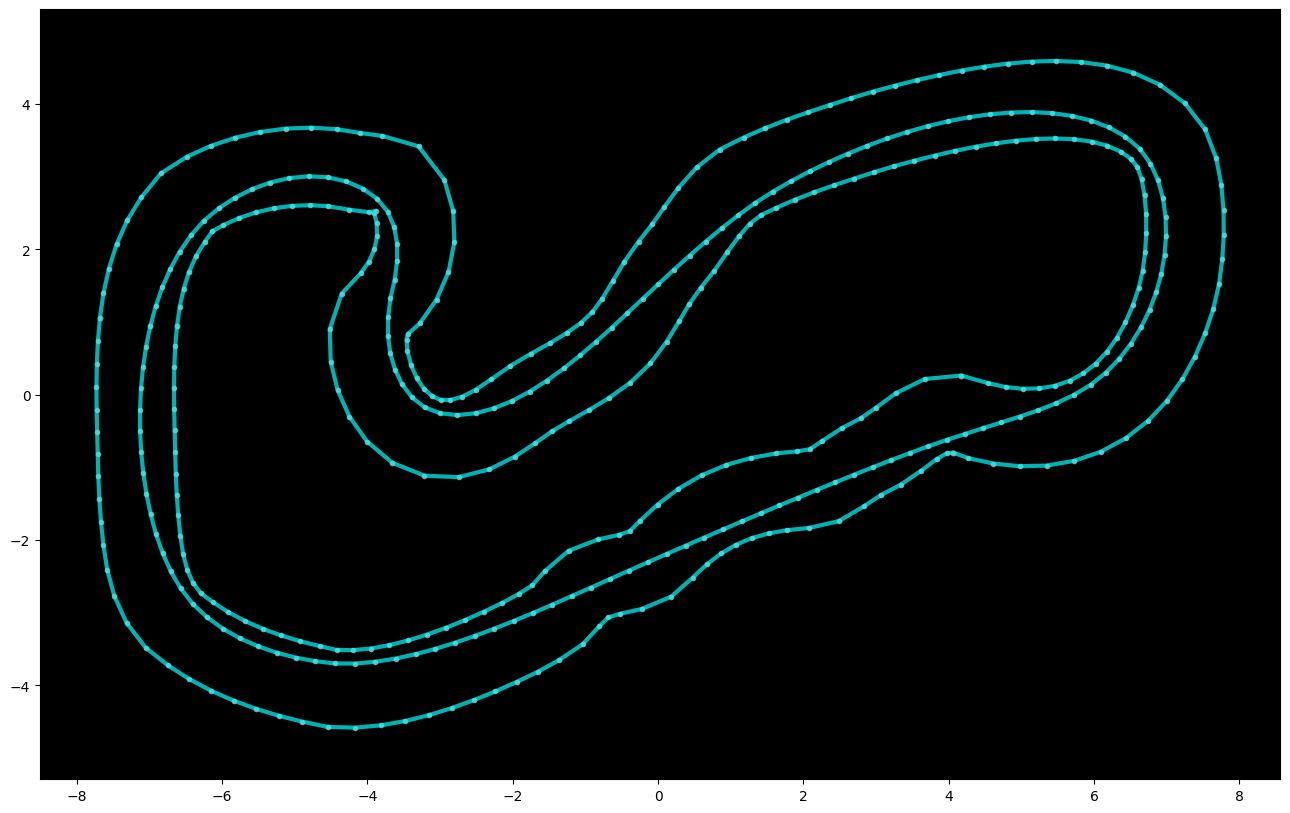

In [5]:
from numpy import array

fname = './racelines/2022_august_open-2000-4-2022-09-14-211800.py'
with open(fname, "r") as file:
    deserialized = eval(file.read())
racing_line = deserialized
fig = plt.figure(1, figsize=(16, 10))
ax = fig.add_subplot(111, facecolor='black')
plt.axis('equal')
print_border(ax, racing_line, inner_border, outer_border)

In [6]:
# Input 3 coords [[x1,y1],[x2,y2],[x3,y3]]
def circle_radius(coords):

    # Flatten the list and assign to variables
    x1, y1, x2, y2, x3, y3 = [i for sub in coords for i in sub]

    a = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
    b = (x1**2+y1**2)*(y3-y2) + (x2**2+y2**2)*(y1-y3) + (x3**2+y3**2)*(y2-y1)
    c = (x1**2+y1**2)*(x2-x3) + (x2**2+y2**2)*(x3-x1) + (x3**2+y3**2)*(x1-x2)
    d = (x1**2+y1**2)*(x3*y2-x2*y3) + (x2**2+y2**2) * \
        (x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1-x1*y2)

    # In case a is zero (so radius is infinity)
    try:
        r = abs((b**2+c**2-4*a*d) / abs(4*a**2)) ** 0.5
    except:
        r = 999

    return r

In [7]:
npoints = len(racing_line) - 1
turning_radii = np.zeros(npoints)
for i in range(npoints):
    nxt = (i + 1) % npoints
    prv = (i - 1) % npoints
    turning_radii[i] = circle_radius([racing_line[prv], racing_line[i], racing_line[nxt]])

In [8]:
turning_radii

array([  4.61373417,   5.13660607,   5.57841134,   5.87702188,
         6.01181265,   6.07617879,   6.07496165,   5.70089851,
         5.30201013,   4.81730165,   3.91250159,   3.2802901 ,
         2.54217341,   2.0348442 ,   1.6970785 ,   2.10668042,
         2.45171329,   2.79733454,   3.13401624,   3.49191983,
         3.89363477,   3.92411187,   2.54080857,   3.09238557,
         3.88558892,   4.85514975,   6.01001864,   7.39541938,
         9.33128175,  11.40039202,  14.13334713,  17.99465437,
        23.90282011,  35.20451525,  55.86225882, 129.15457954,
       128.11007585, 129.94971743, 127.87837945, 122.43926353,
       119.40036053, 115.45277336, 113.60891017, 109.57816194,
       103.24489147,  90.44352622,  79.62929831,  68.49808371,
        57.39727822,  49.1766384 ,  37.34622572,  29.27277957,
        22.71738973,  17.37187184,  13.14387655,  61.06251935,
        92.53242488, 153.35185743,  11.75624937,   5.87395486,
         3.82985396,   2.75355028,   2.00992252,   2.08

In [9]:
def plot_track(ax):
    ax.plot(inner_border[:, 0], inner_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(outer_border[:, 0], outer_border[:, 1], '.', color='#646464', zorder=1)
    ax.plot(inner_border[:, 0], inner_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    ax.plot(outer_border[:, 0], outer_border[:, 1], color='gray', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)

In [12]:
MAX_SPEED = 1.0
MIN_SPEED = 0.5
LOOKAHEAD = 5

c = MIN_SPEED / np.sqrt(np.amin(turning_radii))
# c = 1.5

optimal_speeds = c * np.sqrt(turning_radii)
final_optimal_speeds = np.zeros(npoints)
for i in range(npoints):
    next_close = (i + 1) % npoints
    next_far = (i + 1 + LOOKAHEAD) % npoints
    if next_far > next_close:
        final_optimal_speeds[i] = np.amin(optimal_speeds[next_close:next_far])
    else:
        final_optimal_speeds[i] = np.amin(np.concatenate((optimal_speeds[next_close:], optimal_speeds[:next_far])))
final_optimal_speeds = np.maximum(np.minimum(final_optimal_speeds, MAX_SPEED), MIN_SPEED)

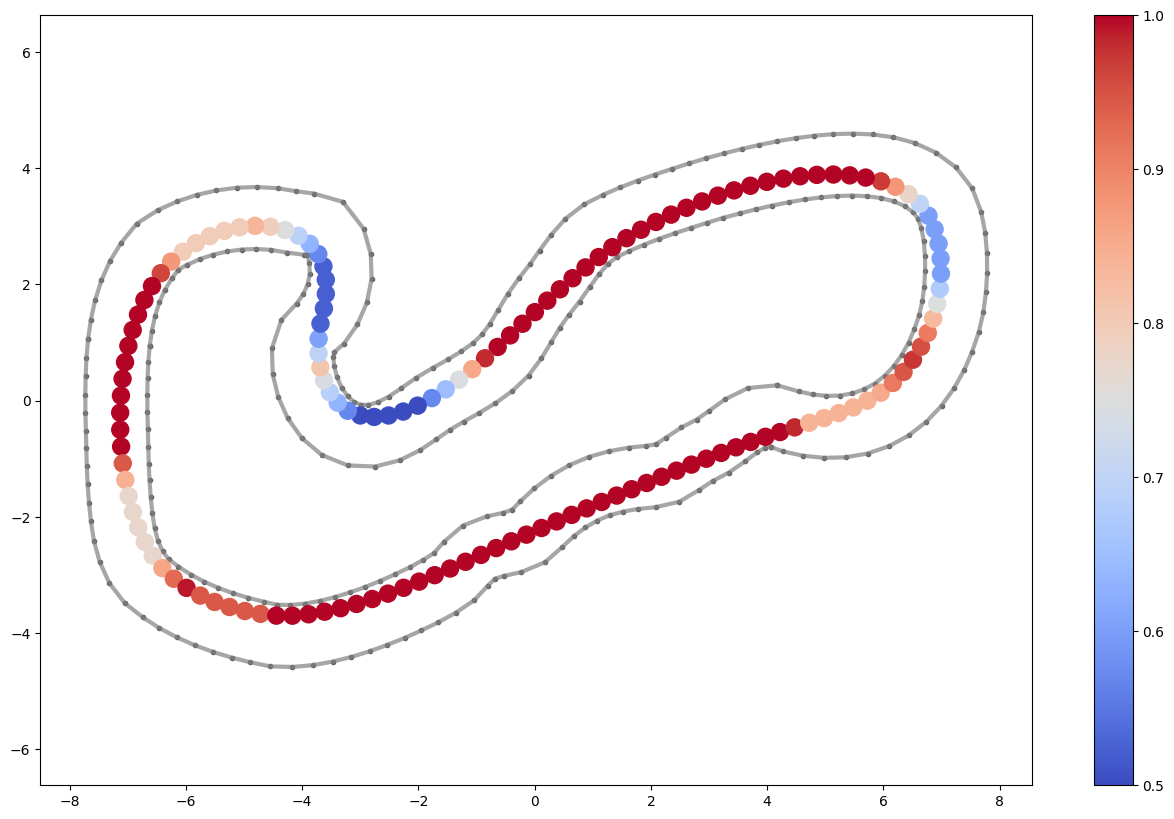

In [13]:
fig = plt.figure(2, figsize=(16, 10))
ax = fig.add_subplot(111)
plt.axis('equal')
plot_track(ax)
scatter = ax.scatter(
    racing_line[:npoints, 0], racing_line[:npoints, 1], s=150,
    c=final_optimal_speeds, cmap='coolwarm', zorder=3
)
fig.colorbar(scatter)

In [14]:
from datetime import datetime

now = datetime.now()
prefix = './speeds/%s-%d-%d-%s' % (TRACK_NAME, c, LOOKAHEAD, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(final_optimal_speeds))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, final_optimal_speeds)

Writing python code to ./speeds/2022_august_open-0-5-2022-09-15-210509.py
Writing numpy binary to ./speeds/2022_august_open-0-5-2022-09-15-210509.npy


In [17]:
from datetime import datetime

now = datetime.now()
prefix = './inner-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(inner_border))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, inner_border)

Writing python code to ./inner-borders/2022_july_open-2022-08-22-150720.py
Writing numpy binary to ./inner-borders/2022_july_open-2022-08-22-150720.npy


In [18]:
from datetime import datetime

now = datetime.now()
prefix = './outer-borders/%s-%s' % (TRACK_NAME, now.strftime('%Y-%m-%d-%H%M%S'))
py_fname = prefix + '.py'
npy_fname = prefix + '.npy'
with open(py_fname, "w") as file:
    print("Writing python code to %s" % py_fname)
    file.write(np.array_repr(outer_border))
    
print("Writing numpy binary to %s" % npy_fname)
np.save(npy_fname, outer_border)

Writing python code to ./outer-borders/2022_july_open-2022-08-22-150722.py
Writing numpy binary to ./outer-borders/2022_july_open-2022-08-22-150722.npy
